## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [1]:
# 1.1

import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

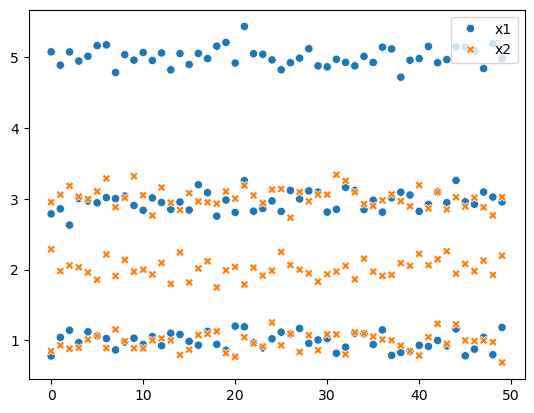

In [9]:
# 1.2
import seaborn as sns
fig1 = sns.scatterplot(data = df0_125)

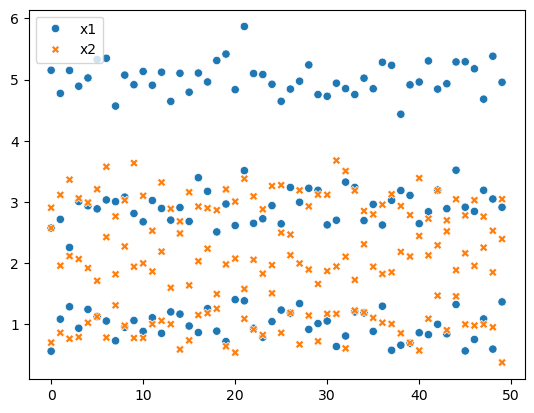

In [5]:
fig2 = sns.scatterplot(data = df0_25)


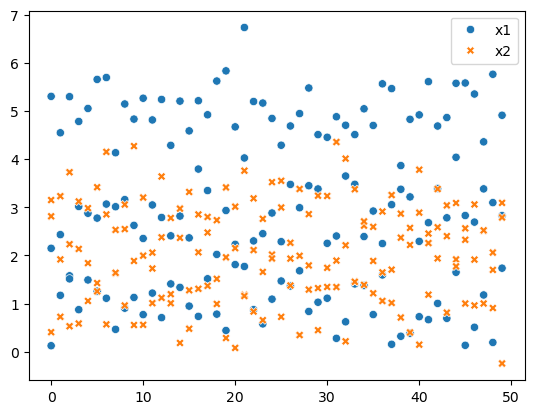

In [6]:
fig3 = sns.scatterplot(data = df0_5)


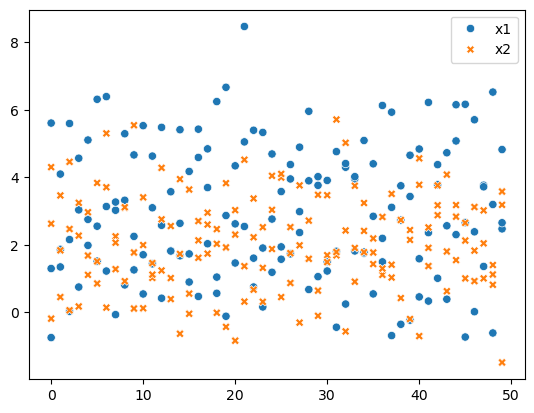

In [7]:
fig4 = sns.scatterplot(data = df1_0)

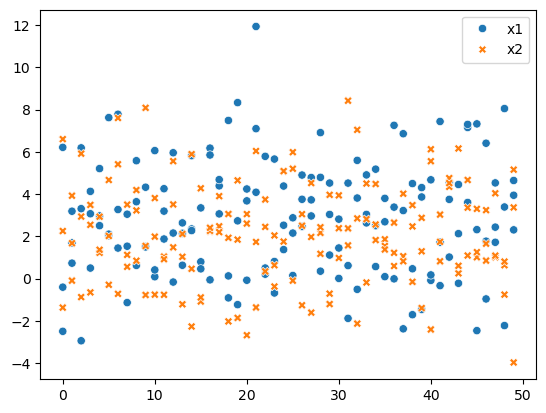

In [8]:
fig5 = sns.scatterplot(data = df2_0)

In [10]:
# 1.2 continued

# As the noise increased, the visual distinctness of the clusters practically disappeared.

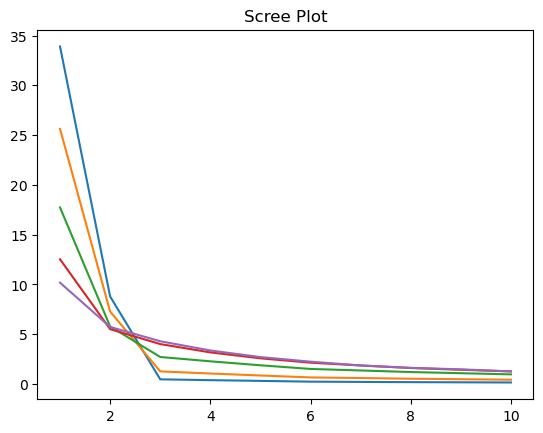

In [16]:
# 1.3 
from sklearn.cluster import KMeans

def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

df0_125 = df0_125.loc[ : , ['x1','x2'] ]
df0_125 = df0_125.apply(maxmin)

# Scree plot 
k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) 
    model = model.fit(df0_125)
    SSE.append(model.inertia_)
    
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

df0_25 = df0_25.loc[ : , ['x1','x2'] ]
df0_25 = df0_25.apply(maxmin)

# Scree plot 2
k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) 
    model = model.fit(df0_25)
    SSE.append(model.inertia_)
    
scree_plot2 = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

df0_5 = df0_5.loc[ : , ['x1','x2'] ]
df0_5 = df0_5.apply(maxmin)

# Scree plot 3
k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) 
    model = model.fit(df0_5)
    SSE.append(model.inertia_)
    
scree_plot3 = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

df1_0 = df1_0.loc[ : , ['x1','x2'] ]
df1_0 = df1_0.apply(maxmin)

# Scree plot 4
k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) 
    model = model.fit(df1_0)
    SSE.append(model.inertia_)
    
scree_plot4 = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

df2_0 = df2_0.loc[ : , ['x1','x2'] ]
df2_0 = df2_0.apply(maxmin)

# Scree plot 5
k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) 
    model = model.fit(df2_0)
    SSE.append(model.inertia_)
    
scree_plot5 = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

In [20]:
# 1.3 continued
# As the noise increases (from the blue line to the orange to the purple), the line's negative slope decreases, and the elbow becoems
# less noticeable and clear. K is best and most easily defined when the noise is at its lowest for the df0_125.


In [19]:
# 1.4 Explain the intuition of the elbow, using this numerical simulation as an example.

# The elbow is when the drop in SSE going from the k before the best k (in this example from 1 to 2) is becomes a lot less than the next
# drop in SSE from the best k to the next k (in this case 2 to 3). The exmaple used here is for the blue line, the df0_125 simulation, but
# all of the lines from significantly from 1 to 2, and then less so from 2 to 3. The drop from 2 to 3 and 3 to 4's difference is
# significant as well, especially on the blue least noise line and from an eyeball standpoint, both 2 and 3 could be the valid best k. 
# The intuition of the elbow is looking for significant decreases in the slope dropping. 

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [120]:
df = pd.read_csv('./data/2022 election cycle fundraising.csv')
df.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,"$7,719,396","$7,449,678","$851,851",$0
1,1,Adam Kinzinger,Republican,Illinois,House,"$2,192,741","$1,243,502","$2,472,888",$0
2,2,Adam Schiff,Democratic,California,House,"$20,993,041","$13,957,854","$20,942,888",$0
3,3,Adam Smith,Democratic,Washington,House,"$1,211,111","$1,173,466","$623,472",$0
4,4,Adrian Smith,Republican,Nebraska,House,"$1,617,611","$1,664,674","$1,098,579",$0


In [121]:
# 2.1 

# I will remove the str "$" and any "," from the numbers.

df.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,"$7,719,396","$7,449,678","$851,851",$0
1,1,Adam Kinzinger,Republican,Illinois,House,"$2,192,741","$1,243,502","$2,472,888",$0
2,2,Adam Schiff,Democratic,California,House,"$20,993,041","$13,957,854","$20,942,888",$0
3,3,Adam Smith,Democratic,Washington,House,"$1,211,111","$1,173,466","$623,472",$0
4,4,Adrian Smith,Republican,Nebraska,House,"$1,617,611","$1,664,674","$1,098,579",$0


In [122]:
df['Raised'] = df['Raised'].str.replace('$', '')
df['Raised'] = df['Raised'].str.replace(',', '')
df['Spent'] = df['Spent'].str.replace('$', '')
df['Spent'] = df['Spent'].str.replace(',', '')
df['Cash on Hand'] = df['Cash on Hand'].str.replace('$', '')
df['Cash on Hand'] = df['Cash on Hand'].str.replace(',', '')
df['Debts'] = df['Debts'].str.replace('$', '')
df['Debts'] = df['Debts'].str.replace(',', '')

In [123]:
df.head()


df['Raised'] = pd.to_numeric(df['Raised'], errors='coerce') 
df['Spent'] = pd.to_numeric(df['Spent'], errors='coerce') 
df['Cash on Hand'] = pd.to_numeric(df['Cash on Hand'], errors='coerce') 
df['Debts'] = pd.to_numeric(df['Debts'], errors='coerce') 


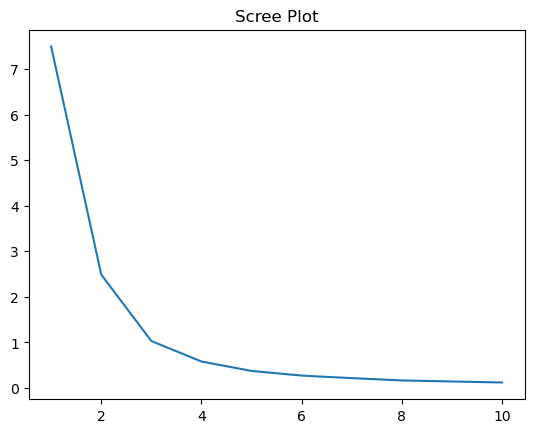

In [124]:
# 2.2

def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x


df_a = df.loc[ : , ['Raised','Spent'] ]
df_a = df_a.apply(maxmin)

# Scree plot
k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) 
    model = model.fit(df_a)
    SSE.append(model.inertia_)
    
scree_plot_R_S = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

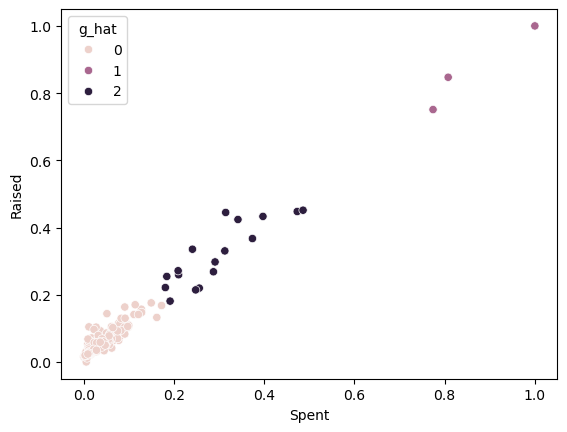

In [ ]:
# k should be 3 (or maybe 2?)
model = KMeans(n_clusters=3,random_state=0)
model = model.fit(df_a) 
df_a['g_hat'] = model.predict(df_a)


fig_R_S = sns.scatterplot(data = df_a, y = "Raised" , x = "Spent", hue = "g_hat")

# The smallest clusters are politicians that raised the most money and spent the most money. The elections that these people were a part of  
# were all hotly contested.

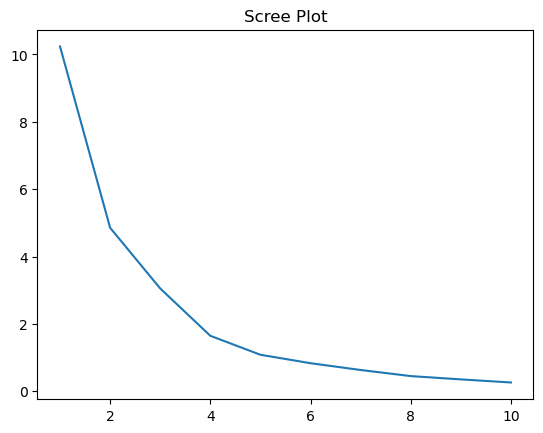

In [127]:
# 2.3

df_b = df.loc[ : , ['Cash on Hand','Debts'] ]
df_b = df_b.apply(maxmin)

# Scree plot
k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) 
    model = model.fit(df_b)
    SSE.append(model.inertia_)
    
scree_plot_R_S = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')


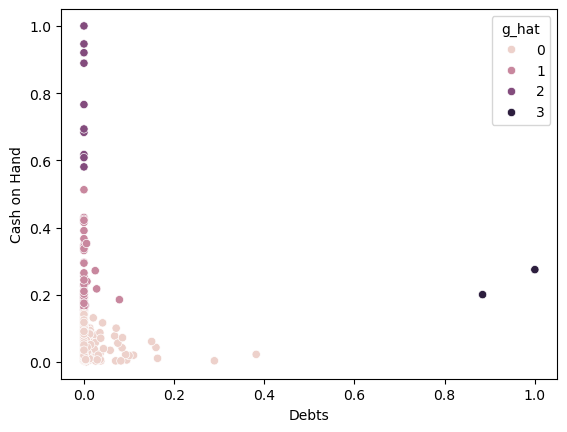

In [130]:
# k should be 4
model = KMeans(n_clusters=4,random_state=0) 
model = model.fit(df_b)
df_b['g_hat'] = model.predict(df_b)


fig_C_D = sns.scatterplot(data = df_b, y = "Cash on Hand" , x = "Debts", hue = "g_hat")

# The people with the smallest clusters are people with a lot of debt and people with lots of money on hand.
# Those with the most cash on hand either ran very big elections or are important figures in the party who have nearly uncontested seats.
# Those with the most debt had big elections that were close, and required a lot of money to support.


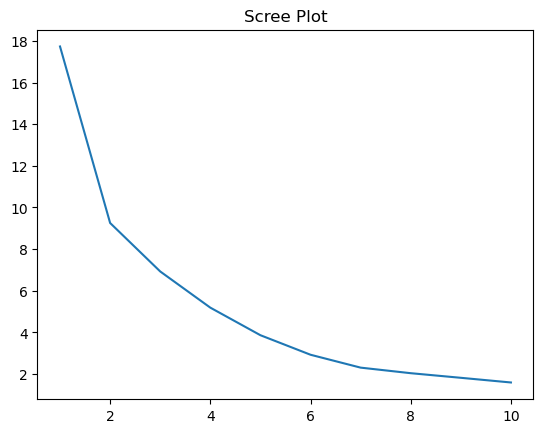

In [132]:
# 2.4

df_c = df.loc[ : , ['Raised', 'Spent', 'Cash on Hand','Debts'] ]
df_c = df_c.apply(maxmin)

# Scree plot
k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) 
    model = model.fit(df_c)
    SSE.append(model.inertia_)
    
scree_plot_ALL = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')



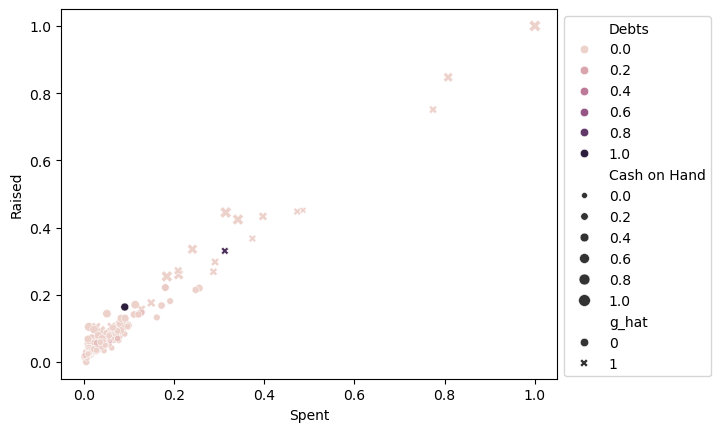

In [136]:

# k should be 3 (or maybe 2?)
model = KMeans(n_clusters=2,random_state=0) # Pass centroids and options into the model
model = model.fit(df_c) # Initialize a kmc model
df_c['g_hat'] = model.predict(df_c)


fig_ALL = sns.scatterplot(data = df_c, y = "Raised" , x = "Spent", hue = "Debts", style = "g_hat" , size = "Cash on Hand")
sns.move_legend(fig_ALL, "upper left", bbox_to_anchor=(1, 1))


# The smallest clusters are politicians that raised the most money and spent the most money. The elections that these people were a part of  
# were all hotly contested.

# Most of the biggest raisers and spenders, had no debts, and lots of cash on hand.

In [137]:
# Did the k-MC algorithm find useful patterns for you in analyzing the election?

# I think so. The clustering algorithm was helpful in distinguishing between different groups, and separating what really was the distinction 
# between the mass of most people, and the different and exceptional. 

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?

In [18]:
# Doing question 2 instead.

In [ ]:
# End